In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Loading the datasets

In [3]:
train_dev = pd.read_csv('training_and_development_data.csv')
employee = pd.read_csv('employee_data.csv')
emp_eng = pd.read_csv('employee_engagement_survey_data.csv')
recruit = pd.read_csv('recruitment_data.csv')

In [4]:
train_dev.head(), employee.head(), emp_eng.head(), recruit.head()

(   Employee ID Training Date   Training Program Name Training Type  \
 0         1001     21-Sep-22        Customer Service      Internal   
 1         1002     19-Jul-23  Leadership Development      Internal   
 2         1003     24-Feb-23        Technical Skills      Internal   
 3         1004     12-Jan-23        Customer Service      Internal   
 4         1005     12-May-23    Communication Skills      External   
 
   Training Outcome           Location            Trainer  \
 0           Failed          Port Greg     Amanda Daniels   
 1           Failed        Brandonview  Brittany Chambers   
 2       Incomplete  Port Briannahaven      Mark Roberson   
 3        Completed      Knightborough     Richard Fisher   
 4           Passed         Bruceshire    Heather Shaffer   
 
    Training Duration(Days)  Training Cost  
 0                        4         510.83  
 1                        2         582.37  
 2                        4         777.06  
 3                      

## Creating The Database, Creating Tables and Loading Datasets to Tables

In [5]:
#used to create a connection to a SQLite database or creating a database
connection = sqlite3.connect('Employees.db')

#loading the datasets into the created tables in the SQLite database "Employees.db"
train_dev.to_sql('train_dev', connection, if_exists='replace', index=False)
employee.to_sql('employee', connection, if_exists='replace', index=False)
emp_eng.to_sql('emp_eng', connection, if_exists='replace', index=False)
recruit.to_sql('recruit', connection, if_exists='replace', index=False)

#creating a cursor object to execute SQL commands
cursor = connection.cursor()

In [40]:
#verify the tables were created
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("The List of The Tables in The Database")
tables

The List of The Tables in The Database


[('CompletedEmployees',),
 ('IncompleteEmployees',),
 ('FailedEmployees',),
 ('train_dev',),
 ('employee',),
 ('emp_eng',),
 ('recruit',),
 ('DesiredSalary_TrainCost',)]

In [7]:
#displaying the tables
for table in tables:
    table_name = table[0]
    print(f"Table Name: {table_name}")
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql(query, connection)
    display(df)
    print("\n")

Table Name: SuccessfulEmployees


,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
1,1011,06-Nov-22,Communication Skills,Internal,Completed,Smithshire,Natalie Fields,1,803.98
2,1016,30-Apr-23,Communication Skills,External,Completed,Lake Stuartfurt,Eric Johnson,2,606.68
3,1024,11-Oct-22,Project Management,External,Completed,Hullmouth,Keith Curtis,5,868.98
4,1030,04-Jan-23,Communication Skills,Internal,Completed,Longton,Wendy Gibson,1,169.46
...,...,...,...,...,...,...,...,...,...
765,3982,09-Dec-22,Technical Skills,Internal,Completed,Rodriguezmouth,Justin Winters,1,189.91
766,3991,19-Sep-22,Customer Service,Internal,Completed,Chapmanshire,Walter Daniels,4,716.52
767,3992,13-Sep-22,Project Management,External,Completed,Claychester,Kimberly Peterson,3,323.25
768,3998,26-Sep-22,Customer Service,External,Completed,Port Kyle,Andre Donaldson,1,994.09




Table Name: CompletedEmployees


,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
1,1011,06-Nov-22,Communication Skills,Internal,Completed,Smithshire,Natalie Fields,1,803.98
2,1016,30-Apr-23,Communication Skills,External,Completed,Lake Stuartfurt,Eric Johnson,2,606.68
3,1024,11-Oct-22,Project Management,External,Completed,Hullmouth,Keith Curtis,5,868.98
4,1030,04-Jan-23,Communication Skills,Internal,Completed,Longton,Wendy Gibson,1,169.46
...,...,...,...,...,...,...,...,...,...
765,3982,09-Dec-22,Technical Skills,Internal,Completed,Rodriguezmouth,Justin Winters,1,189.91
766,3991,19-Sep-22,Customer Service,Internal,Completed,Chapmanshire,Walter Daniels,4,716.52
767,3992,13-Sep-22,Project Management,External,Completed,Claychester,Kimberly Peterson,3,323.25
768,3998,26-Sep-22,Customer Service,External,Completed,Port Kyle,Andre Donaldson,1,994.09




Table Name: IncompleteEmployees


,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
1,1008,02-Aug-23,Technical Skills,External,Incomplete,Lowemouth,Erica Maxwell,2,758.18
2,1009,21-Aug-22,Customer Service,Internal,Incomplete,Johnland,Katelyn Hartman,2,101.21
3,1010,19-Aug-22,Communication Skills,External,Incomplete,Lake Kimfurt,Rhonda Clark,5,332.25
4,1013,08-Apr-23,Project Management,External,Incomplete,East Jessicatown,Michael Marks,2,657.85
...,...,...,...,...,...,...,...,...,...
770,3972,25-Apr-23,Leadership Development,External,Incomplete,Lindaville,Michael Patterson,5,853.57
771,3980,27-Jul-23,Communication Skills,External,Incomplete,Port Janiceville,Cynthia Wilson,1,695.56
772,3984,07-Aug-22,Communication Skills,Internal,Incomplete,Farmerside,Audrey Gray,1,202.91
773,3995,23-Dec-22,Project Management,External,Incomplete,Ericfort,Robert Cooley,3,803.73




Table Name: FailedEmployees


,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1006,08-May-23,Project Management,Internal,Failed,Erinfort,Michael Duke,2,838.07
3,1007,14-May-23,Leadership Development,External,Failed,New Christopher,Virginia Clayton DVM,2,667.32
4,1012,28-Mar-23,Technical Skills,External,Failed,Howardburgh,Theresa Martinez,3,887.08
...,...,...,...,...,...,...,...,...,...
711,3990,10-Oct-22,Technical Skills,Internal,Failed,West Adambury,Justin Macdonald,2,475.04
712,3993,27-Jan-23,Communication Skills,Internal,Failed,Amandaville,Nathan Lewis,2,229.00
713,3994,11-Feb-23,Customer Service,Internal,Failed,Davidsonfurt,Joshua Orr,1,861.91
714,3996,09-Jan-23,Customer Service,Internal,Failed,North Emily,Carmen Cortez,2,808.51




Table Name: salary_cost


,Employee ID,Desired Salary,Training Cost
0,1001,60103.21,510.83
1,1002,64575.84,582.37
2,1003,39422.71,777.06
3,1004,51045.11,824.30
4,1005,52792.86,145.99
...,...,...,...
2995,3996,65428.69,808.51
2996,3997,37297.03,629.16
2997,3998,31093.70,994.09
2998,3999,59442.38,477.78




Table Name: train_dev


,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,12-May-23,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99
...,...,...,...,...,...,...,...,...,...
2995,3996,09-Jan-23,Customer Service,Internal,Failed,North Emily,Carmen Cortez,2,808.51
2996,3997,19-Sep-22,Project Management,External,Failed,West Zachary,Katrina Parker,4,629.16
2997,3998,26-Sep-22,Customer Service,External,Completed,Port Kyle,Andre Donaldson,1,994.09
2998,3999,02-Jul-23,Leadership Development,Internal,Incomplete,Williamsland,Brian Obrien,5,477.78




Table Name: employee


,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,None,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,None,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,None,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,None,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,None,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3422,Jakobe,Erickson,22-Jun-22,07-Aug-22,Production Technician I,Bethany Carter,jakobe.erickson@bilearner.com,PYZ,Leave of Absence,...,Engineers,23-06-1998,MA,Model Assistant,Female,44500,Other,Widowed,Fully Meets,3
2996,3423,Adyson,Strickland,28-Dec-20,None,Production Technician I,Caroline Harris,adyson.strickland@bilearner.com,SVG,Active,...,Engineers,10-06-2001,MA,Engineer,Male,35444,Black,Widowed,Fully Meets,3
2997,3424,Annabel,Wilkins,09-Dec-20,04-Aug-22,Production Technician I,Mr. James Castillo,annabel.wilkins@bilearner.com,TNS,Voluntarily Terminated,...,Wireline Construction,27-01-1997,MA,Laborer,Male,6608,White,Single,Fully Meets,2
2998,3425,Kendra,Braun,28-May-19,23-Oct-21,Production Technician I,Michael Woods,kendra.braun@bilearner.com,WBL,Voluntarily Terminated,...,Aerial,28-05-1954,MA,Foreman,Female,3807,Hispanic,Divorced,Fully Meets,2




Table Name: emp_eng


,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,1001,10-10-2022,2,5,5
1,1002,03-08-2023,4,5,3
2,1003,03-01-2023,2,5,2
3,1004,30-07-2023,3,5,3
4,1005,19-06-2023,2,4,5
...,...,...,...,...,...
2995,3996,14-04-2023,3,5,1
2996,3997,10-09-2022,2,4,1
2997,3998,22-02-2023,5,5,2
2998,3999,02-10-2022,5,4,2




Table Name: recruit


,Applicant ID,Application Date,First Name,Last Name,Gender,Date of Birth,Phone Number,Email,Address,City,State,Zip Code,Country,Education Level,Years of Experience,Desired Salary,Job Title,Status
0,1001,03-Jun-23,Scott,Sheppard,Male,31-08-1992,421-429-7655x39421,perezjanet@example.org,597 Smith Point,Hollandfort,NV,57588,Micronesia,High School,8,60103.21,Chief Technology Officer,Interviewing
1,1002,15-May-23,Stanley,Lewis,Male,29-04-1965,+1-451-574-5308x1681,grossmark@example.com,8116 Stuart Loop,Port Margaretfurt,TN,14726,Greenland,Bachelor's Degree,17,64575.84,"Designer, furniture",Rejected
2,1003,04-Aug-23,Javier,Li,Female,10-03-1973,(858)901-5499,katiemaldonado@example.com,5940 Barr Villages Suite 075,Dianaland,TX,4699,China,PhD,20,39422.71,"Sound technician, broadcasting/film/video",Rejected
3,1004,28-Jul-23,Christopher,Johnston,Other,04-04-2001,(853)681-1839x2010,sheila73@example.com,442 Lewis Mount,Youngfurt,GA,34455,Ghana,High School,8,51045.11,Air cabin crew,Rejected
4,1005,05-Jun-23,Melissa,Hicks,Other,17-06-1978,364-575-8478x67812,emilypatterson@example.org,95961 Taylor Circles Apt. 169,East Ashleyborough,IN,21014,Solomon Islands,Master's Degree,0,52792.86,Art therapist,Interviewing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,18-May-23,Melinda,Butler,Male,25-11-1993,001-324-747-3549x4392,davisvickie@example.org,1307 Stephen Walk Apt. 998,West Jennifer,WY,17130,India,PhD,20,65428.69,"Psychologist, forensic",Offered
2996,3997,12-Jul-23,Latasha,Johnson,Male,29-01-1978,(870)454-9481x49987,gpeterson@example.net,2945 Morse Wells,New Lindsey,MH,81966,Turkey,Bachelor's Degree,0,37297.03,Operational investment banker,Applied
2997,3998,19-Jun-23,Cheryl,Gill,Other,08-02-2000,001-847-873-3665,bschultz@example.net,36716 Kevin Locks Suite 422,Schmidtfurt,ME,59399,Maldives,High School,10,31093.70,Petroleum engineer,Rejected
2998,3999,16-May-23,Danielle,Villegas,Female,08-08-1994,(385)467-6434x67311,alvarezstephen@example.net,0983 Jeremy Burgs,Michaelhaven,KY,37855,Ghana,Bachelor's Degree,14,59442.38,Housing manager/officer,Applied


In [8]:
query = f'''
    SELECT * from train_dev
    '''
pd.read_sql(query, connection)

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,12-May-23,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99
...,...,...,...,...,...,...,...,...,...
2995,3996,09-Jan-23,Customer Service,Internal,Failed,North Emily,Carmen Cortez,2,808.51
2996,3997,19-Sep-22,Project Management,External,Failed,West Zachary,Katrina Parker,4,629.16
2997,3998,26-Sep-22,Customer Service,External,Completed,Port Kyle,Andre Donaldson,1,994.09
2998,3999,02-Jul-23,Leadership Development,Internal,Incomplete,Williamsland,Brian Obrien,5,477.78


In [9]:
create_new_table= f'''
    CREATE TABLE IF NOT EXISTS CompletedEmployees AS
    SELECT * from train_dev WHERE "Training Outcome" = 'Completed';
    '''
connection.execute(create_new_table)
connection.commit()

# Verify the new table was created and contains the correct data
query = "SELECT * FROM CompletedEmployees;"
CompletedEmployees = pd.read_sql(query, connection)
display(CompletedEmployees)

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
1,1011,06-Nov-22,Communication Skills,Internal,Completed,Smithshire,Natalie Fields,1,803.98
2,1016,30-Apr-23,Communication Skills,External,Completed,Lake Stuartfurt,Eric Johnson,2,606.68
3,1024,11-Oct-22,Project Management,External,Completed,Hullmouth,Keith Curtis,5,868.98
4,1030,04-Jan-23,Communication Skills,Internal,Completed,Longton,Wendy Gibson,1,169.46
...,...,...,...,...,...,...,...,...,...
765,3982,09-Dec-22,Technical Skills,Internal,Completed,Rodriguezmouth,Justin Winters,1,189.91
766,3991,19-Sep-22,Customer Service,Internal,Completed,Chapmanshire,Walter Daniels,4,716.52
767,3992,13-Sep-22,Project Management,External,Completed,Claychester,Kimberly Peterson,3,323.25
768,3998,26-Sep-22,Customer Service,External,Completed,Port Kyle,Andre Donaldson,1,994.09


In [10]:
query = f'''
    SELECT AVG("Training Cost") AS "Average Training Cost of Completed Training" FROM CompletedEmployees
    '''
complete_train_cost = pd.read_sql(query, connection)

In [11]:
create_new_table= f'''
    CREATE TABLE IF NOT EXISTS IncompleteEmployees AS
    SELECT * from train_dev WHERE "Training Outcome" = 'Incomplete';
    '''
connection.execute(create_new_table)
connection.commit()

# Verify the new table was created and contains the correct data
query = "SELECT * FROM IncompleteEmployees;"
IncompleteEmployees = pd.read_sql(query, connection)
display(IncompleteEmployees)

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
1,1008,02-Aug-23,Technical Skills,External,Incomplete,Lowemouth,Erica Maxwell,2,758.18
2,1009,21-Aug-22,Customer Service,Internal,Incomplete,Johnland,Katelyn Hartman,2,101.21
3,1010,19-Aug-22,Communication Skills,External,Incomplete,Lake Kimfurt,Rhonda Clark,5,332.25
4,1013,08-Apr-23,Project Management,External,Incomplete,East Jessicatown,Michael Marks,2,657.85
...,...,...,...,...,...,...,...,...,...
770,3972,25-Apr-23,Leadership Development,External,Incomplete,Lindaville,Michael Patterson,5,853.57
771,3980,27-Jul-23,Communication Skills,External,Incomplete,Port Janiceville,Cynthia Wilson,1,695.56
772,3984,07-Aug-22,Communication Skills,Internal,Incomplete,Farmerside,Audrey Gray,1,202.91
773,3995,23-Dec-22,Project Management,External,Incomplete,Ericfort,Robert Cooley,3,803.73


In [12]:
query = f'''
    SELECT AVG("Training Cost") AS "Average Training Cost of Incomplete Training" FROM IncompleteEmployees
    '''
incomplete_train_cost = pd.read_sql(query, connection)

In [13]:
create_new_table = f'''
    CREATE TABLE IF NOT EXISTS FailedEmployees AS
    SELECT * FROM train_dev WHERE "Training Outcome" = 'Failed'
    '''
connection.execute(create_new_table)
connection.commit()

query = f'SELECT * FROM FailedEmployees'
FailedEmployees = pd.read_sql(query, connection)
display(FailedEmployees)

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1006,08-May-23,Project Management,Internal,Failed,Erinfort,Michael Duke,2,838.07
3,1007,14-May-23,Leadership Development,External,Failed,New Christopher,Virginia Clayton DVM,2,667.32
4,1012,28-Mar-23,Technical Skills,External,Failed,Howardburgh,Theresa Martinez,3,887.08
...,...,...,...,...,...,...,...,...,...
711,3990,10-Oct-22,Technical Skills,Internal,Failed,West Adambury,Justin Macdonald,2,475.04
712,3993,27-Jan-23,Communication Skills,Internal,Failed,Amandaville,Nathan Lewis,2,229.00
713,3994,11-Feb-23,Customer Service,Internal,Failed,Davidsonfurt,Joshua Orr,1,861.91
714,3996,09-Jan-23,Customer Service,Internal,Failed,North Emily,Carmen Cortez,2,808.51


In [14]:
query = f'''
    SELECT AVG("Training Cost") AS "Average Training Cost of Failed Training" FROM FailedEmployees
    '''
failed_train_cost = pd.read_sql(query, connection)
failed_train_cost

,Average Training Cost of Failed Training
0,557.471159


In [15]:
complete_train_cost, incomplete_train_cost, failed_train_cost

(   Average Training Cost of Completed Training
 0                                   560.659545,
    Average Training Cost of Incomplete Training
 0                                    553.874813,
    Average Training Cost of Failed Training
 0                                557.471159)

In [16]:
query = f'''
    SELECT DISTINCT [Training Program Name] FROM train_dev
    '''
pd.read_sql(query, connection)

,Training Program Name
0,Customer Service
1,Leadership Development
2,Technical Skills
3,Communication Skills
4,Project Management


In [17]:
query = f'''
    SELECT "Training Program Name", AVG("Training Cost") AS "Average Training Cost" FROM train_dev 
    GROUP BY "Training Program Name"
    ORDER BY AVG("Training Cost") ASC
    '''
pd.read_sql(query, connection)

,Training Program Name,Average Training Cost
0,Communication Skills,542.382229
1,Technical Skills,557.983782
2,Project Management,563.732627
3,Leadership Development,564.289251
4,Customer Service,567.389451


## Joining The "train_dev" and "recruit" Table to See The Relation Between Training Cost and Desired Salary

In [29]:
query = f'''
    CREATE TABLE IF NOT EXISTS DesiredSalary_TrainCost AS
    SELECT recruit.[First Name], recruit.[Last Name], recruit.[Desired Salary], 
    train_dev.[Training Program Name], train_dev.[Training Cost] FROM train_dev
    INNER JOIN recruit ON recruit.[Applicant ID]=train_dev.[Employee ID]
    '''
connection.execute(query)
connection.commit()

## By calculating The Average Desired Salary and The Average Training Cost We Will Try to Find a Connection

In [30]:
query = f'''
    SELECT AVG("Desired Salary") AS "Average Desired Salary" FROM recruit
    '''
query1= f'''
    SELECT AVG("Training Cost") AS "Average Training Cost" FROM train_dev
    '''
average_training_cost = pd.read_sql(query1, connection)
average_desired_salary = pd.read_sql(query, connection)

In [31]:
#this line converts vectoral dataframes into scalar values by using .iloc[0]
scalar_average_training_cost = average_training_cost["Average Training Cost"].iloc[0]
scalar_average_desired_salary = average_desired_salary["Average Desired Salary"].iloc[0]

In [32]:
salary_cost_ratio = scalar_average_desired_salary / scalar_average_training_cost
print(f'Desired Salary - Training Cost Ratio: ', salary_cost_ratio)

Desired Salary - Training Cost Ratio:  116.49787765706662


In [41]:
create_table = f'''
    CREATE TABLE IF NOT EXISTS salary_cost AS
    SELECT train_dev.[Employee ID], recruit.[Desired Salary] AS desired_salary
    ,train_dev.[Training Cost] AS training_cost
    FROM train_dev
    JOIN recruit ON recruit.[Applicant ID]=train_dev.[Employee ID]
    '''
connection.execute(create_table)
connection.commit()

In [42]:
query=f'''
    SELECT * from salary_cost
    '''
pd.read_sql(query, connection)

,Employee ID,desired_salary,training_cost
0,1001,60103.21,510.83
1,1002,64575.84,582.37
2,1003,39422.71,777.06
3,1004,51045.11,824.30
4,1005,52792.86,145.99
...,...,...,...
2995,3996,65428.69,808.51
2996,3997,37297.03,629.16
2997,3998,31093.70,994.09
2998,3999,59442.38,477.78


In [43]:
query = f'''
    SELECT desired_salary, training_cost FROM salary_cost
    '''
salary_cost_df = pd.read_sql(query, connection)

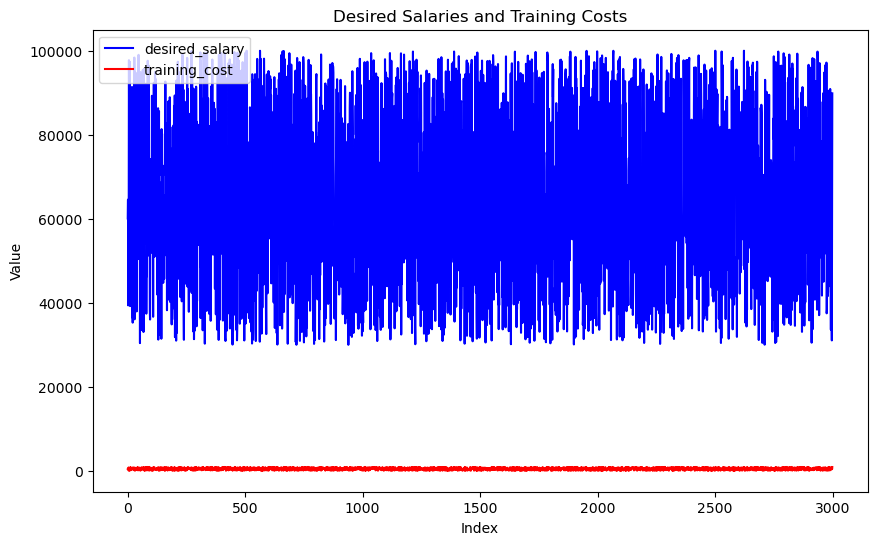

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(salary_cost_df.index, salary_cost_df['desired_salary'], label='desired_salary', color='blue')

plt.plot(salary_cost_df.index, salary_cost_df['training_cost'], label='training_cost', color='red')

plt.title('Desired Salaries and Training Costs')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.show()